## Optimization for statistical learning
We first install the packages.

In [5]:
# Install packages #
!pip install numpy
!pip install matplotlib
!pip install torch
!pip install xlrd
!pip install pandas

     --------------------------------------- 11.2/11.2 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 502.5/502.5 KB 15.9 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 KB 10.4 MB/s eta 0:00:00


Below is to load the dataset.

In [12]:
# Load the dataset #
import csv

# Load the training dataset
print("===Training Dataset===")
with open("bmi_train.csv",'r') as dataset_train:
    dataset_train_rows = csv.reader(dataset_train,delimiter=',')
    # Skip the header row
    next(dataset_train_rows)

    # Extract features (X) and target values (y) from the dataset
    X = []
    y = []
    
    # Store the data
    for r in dataset_train_rows:
        
        # Convert "Male" to 1 and "Female" to 0
        gender = 1 if r[0] == "Male" else 0
        X.append([gender, float(r[1]), float(r[2])])
        y.append(float(r[3]))
        
        # print the dataset for reference
        print(r)

# Load the validation dataset
#print("===Validation Dataset===")
#with open("bmi_validation.csv",'r') as dataset_validation:
#    dataset_validation_rows = csv.reader(dataset_validation,delimiter=',')
#    # Skip the header row
#    next(dataset_validation_rows)
#
#    # Extract features (X) and target values (y) from the dataset
#    X_val = []
#    y_val = []
#    
#    # Store the data
#    for r in dataset_validation_rows:
#        
#        # Convert "Male" to 1 and "Female" to 0
#        gender = 1 if r[0] == "Male" else 0
#        X_val.append([gender, float(r[1]), float(r[2])])
#        y_val.append(float(r[3]))
#        
#        # print the dataset for reference
#        print(r)

===Training Dataset===
['Male', '161', '89', '4']
['Male', '179', '127', '4']
['Male', '172', '139', '5']
['Male', '153', '104', '5']
['Male', '165', '68', '2']
['Male', '172', '92', '4']
['Male', '182', '108', '4']
['Male', '179', '130', '5']
['Male', '142', '71', '4']
['Female', '158', '153', '5']
['Male', '194', '108', '3']
['Female', '178', '107', '4']
['Male', '155', '57', '2']
['Female', '151', '64', '3']
['Female', '181', '80', '2']
['Female', '147', '126', '5']
['Female', '142', '159', '5']
['Male', '165', '155', '5']
['Female', '146', '104', '5']
['Male', '157', '56', '2']
['Female', '173', '82', '2']
['Female', '170', '102', '4']
['Female', '190', '118', '4']
['Female', '168', '140', '5']
['Female', '153', '78', '2']
['Male', '188', '123', '4']
['Female', '162', '64', '2']
['Male', '182', '104', '4']
['Male', '194', '115', '4']
['Female', '185', '102', '3']
['Male', '178', '52', '1']
['Female', '192', '90', '2']
['Male', '147', '142', '5']
['Male', '152', '103', '5']
['Female

Here is the function of error rate analysis.

In [13]:
# Error Rate Analysis #
def error_rate(X, w, y):
    TER = 0
    for i in range(X.shape[0]):
        y_pred = round(np.dot(X[i], w))
        if y_pred != y[i]:
            TER += 1
    
    TER_rate = TER / X.shape[0]
    return TER_rate

Below is the gradient descent method without Pytorch.

Learned parameters:
theta0 = 0.03245734072827619
theta1 = -0.5942213125848144
theta2 = 1.1156042782120612


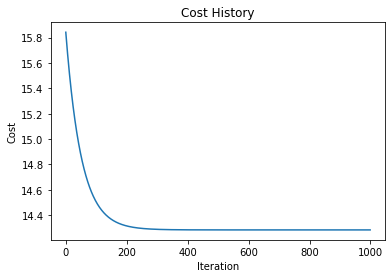

Training error rate:  0.985


IndexError: index 0 is out of bounds for axis 0 with size 0

In [14]:
# Gradient Descent #
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    cost_history = []
    
    for _ in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, theta)
        
        # Calculate the difference between predictions and actual values
        error = y_pred - y
        
        # Calculate the gradient
        gradient = (1/num_samples) * np.dot(X.T, error)
        
        # Update theta using the learning rate and gradient
        theta -= learning_rate * gradient
        
        # Calculate the cost (mean squared error)
        cost = np.mean(np.square(error))
        cost_history.append(cost)
    
    return theta, cost_history

# Example usage:
# Generate some random data for demonstration
# np.random.seed(0)
# num_samples = 100
# num_features = 2
# X = np.random.rand(num_samples, num_features)
# y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(num_samples)

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Normalize the features (optional but recommended for gradient descent)
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Train the model using gradient descent
theta, cost_history = gradient_descent(X_normalized, y)

# Print the learned parameters
print("Learned parameters:")

for i, theta_i in enumerate(theta):
    print(f"theta{i} =", theta_i)

# Plot the cost history
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

print("Training error rate: ", error_rate(X, theta, y))
print("Testing error rate: ", error_rate(X_val, theta, y_val))

Below is the gradient descent method with Pytorch.

tensor([[0.0813, 0.7324, 0.2895, 0.2177, 0.7998, 0.0695, 0.9041, 0.3947, 0.5163]])
